In [25]:
from astroML import stats as astroMLstats

def bins_num (X) :

    sigmaG2 = astroMLstats.sigmaG(X) # quantile at 75 - quantile at 25
    binsize = 2.7 * sigmaG2 / (len(X)**(1/3)) #Freedman-Diaconis
    N = (max(X) - min(X))/binsize

    return int(N+2)

**I measur the position of a quasar N times, and by hipotesis they are distribuited as a gaussian around 1**

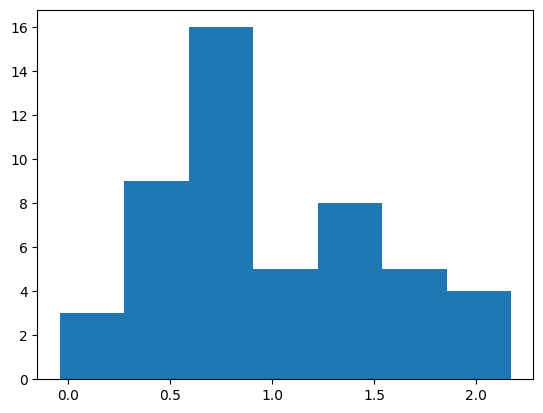

In [26]:
import numpy as np
from matplotlib import pyplot as plt

N = 50           # ripetition
mu = 1           # true position
sigma = 0.5      # "gaussian noise" around the true position
x = np.random.normal(mu, sigma , N)

plt.hist(x, bins_num(x))
plt.show()

**Center a gaussian with sigma equal at the homoschedastic error of 0,2 in each point.**

**this process it's equivalent to plot the likelihoo of each measurment**

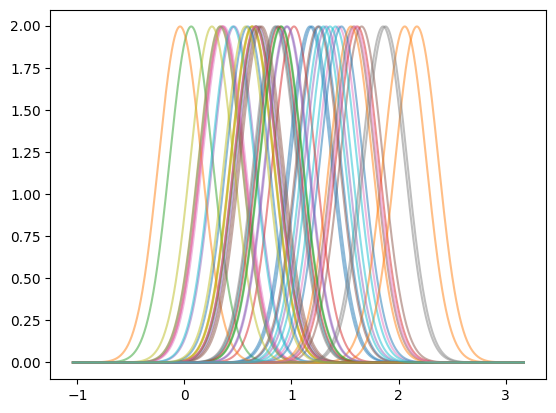

In [27]:
sigma_err = 0.2                                                 #omoschedastic error
x_vals = np.linspace(min(x)-2*sigma, max(x)+2*sigma, 1000)      # plot extremis

for i in range(N):
    gaussiana = (1 / (sigma_err * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - x[i]) / sigma_err) ** 2)
    plt.plot(x_vals, gaussiana, alpha=0.5)

**I plot the product of the Gaussians, i.e., the likelihood of the entire dataset**

/tmp/ipykernel_14316/295522370.py:13: RuntimeWarning: divide by zero encountered in log
  likelihood = np.log(likelihood) # logarithm of the likelihood


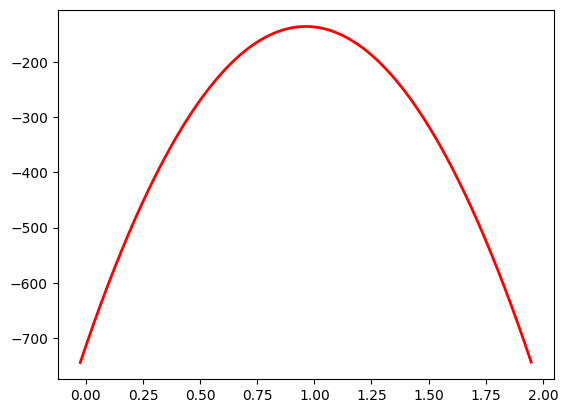

In [28]:
likelihood = []

for i in range(len(x_vals)): # compute the likelihood for each value in the x-axis interval

    L = 1 # reset likelihood to 1 after each loop

    for j in range(N): # product of the PDFs for each x value

        L *= (1 / (sigma_err * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x[j] - x_vals[i]) / sigma_err) ** 2) 
        
    likelihood.append(L)
        
likelihood = np.log(likelihood) # logarithm of the likelihood

plt.plot(x_vals, likelihood, color='red', linewidth=2)


**Find of the log likelihood max**

In [29]:
x_max_log_like = x_vals[np.argmax(likelihood)] # x value corresponding to the maximum of the log-likelihood
print('The maximum value of the log-likelihood is:', x_max_log_like)

# now compare with the estimator of mu
mu_hat = np.mean(x)
print('The estimated value of mu is:', mu_hat)

err_max_log = np.abs(x_max_log_like - mu)/mu
err_mu_hat = np.abs(mu_hat - mu)/mu

print('\n\nRelative error on the maximum of the log-likelihood:', err_max_log)
print('Relative error on the estimator of mu:', err_mu_hat)

if (err_max_log < err_mu_hat):
    print('\n\nThe maximum of the log-likelihood is a more efficient estimator of mu')
else:
    print('\n\nThe estimator of mu is more efficient than the maximum of the log-likelihood')


The maximum value of the log-likelihood is: 0.9621698022616447
The estimated value of mu is: 0.9625074158741792


Relative error on the maximum of the log-likelihood: 0.037830197738355276
Relative error on the estimator of mu: 0.037492584125820794


The estimator of mu is more efficient than the maximum of the log-likelihood


**Print and evaluate the Fisher matrix of error**

In [30]:
F_mu = N / sigma_err**2                             # from theory
print("\nFisher matrix (1x1):", F_mu)               # in the end, it's just one parameter...

sigma_mu = np.sqrt(1 / F_mu)

print("Expected standard error (standard deviation):", sigma_mu)

print("\n------------------------------------------------------------------\n")

# now I'll try to compute it numerically

dx = x_vals[1] - x_vals[0] # uniform spacing of the x-axis
second_derivative = -1 * np.diff(likelihood, 2) / dx**2

# I need to evaluate the derivative at the maximum, but I find (CHAT GPT) that np.diff scales the indices

index_max = np.argmax(likelihood) # this is the maximum of the log-likelihood

# the second derivative has a length of N-2
index_fisher = index_max - 2  

F_mu = second_derivative[index_fisher] # evaluate the second derivative at the correct index
print("Numerical estimate of the Fisher Information:", F_mu)

# using the Cramer-Rao bound
sigma_mu_numerica = np.sqrt(1 / F_mu)

print("Numerical expected standard error on mu:", sigma_mu_numerica)




Fisher matrix (1x1): 1249.9999999999998
Expected standard error (standard deviation): 0.028284271247461905

------------------------------------------------------------------

Numerical estimate of the Fisher Information: 1249.999999998743
Numerical expected standard error on mu: 0.028284271247476123


**Plot two Gaussians with the estimated center and estimated error above**

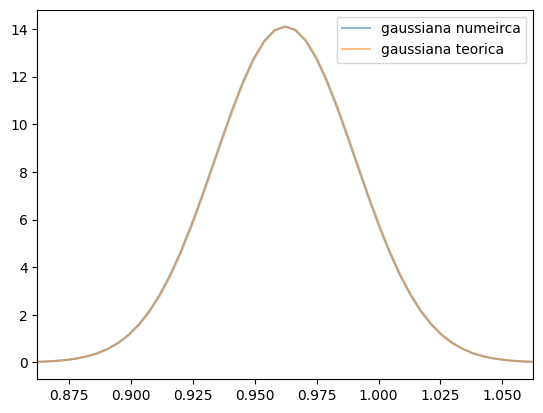

In [31]:
gaussiana1 = (1 / (sigma_mu_numerica * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - x_max_log_like) / sigma_mu_numerica) ** 2)
gaussiana2 = (1 / (sigma_mu * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - mu_hat) / sigma_mu) ** 2)

plt.plot(x_vals, gaussiana1, alpha=0.5, label = "gaussiana numeirca")
plt.plot(x_vals, gaussiana2, alpha=0.5, label = "gaussiana teorica")

min_plot = min(x_max_log_like,mu_hat)-0.1
max_plot = max(x_max_log_like,mu_hat)+0.1

plt.xlim(min_plot, max_plot)
plt.legend()

**I now implement part 3, where I generate a Gaussian distribution of errors, centered at 0.2 and with sigma 0.05 .**

**That is, I repeat the entire procedure above (avoiding comments) generalizing to heteroscedasticity.**

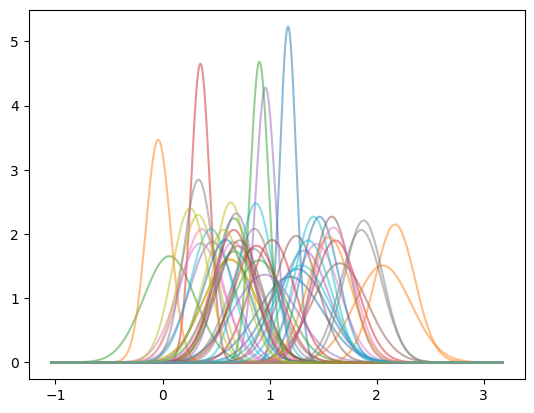

In [32]:
centro_sigma = 0.2
sigma_sigma = 0.05

val_err = np.random.normal(centro_sigma, sigma_sigma , N)

for i in range(N):
    gaussiana = (1 / (val_err[i] * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - x[i]) / val_err[i]) ** 2)
    plt.plot(x_vals, gaussiana, alpha=0.5)

/tmp/ipykernel_14316/1874005926.py:13: RuntimeWarning: divide by zero encountered in log
  likelihood = np.log(likelihood) # logarithm of the likelihood


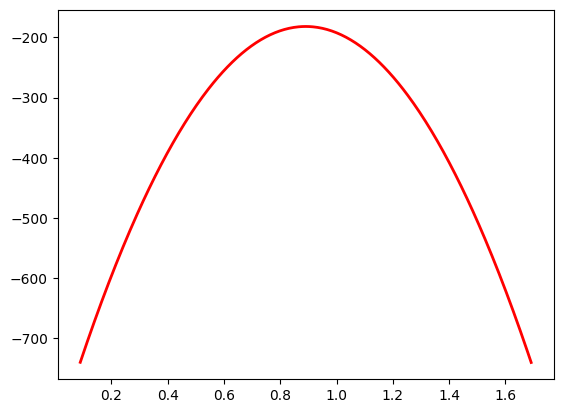

In [33]:
likelihood = []

for i in range(len(x_vals)): # calculate the likelihood for each value in the interval

    L = 1

    for j in range(N): # product of the PDFs for each x value

        L *= (1 / (val_err[j] * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x[j] - x_vals[i]) / val_err[j]) ** 2) 
        
    likelihood.append(L)
        
likelihood = np.log(likelihood) # logarithm of the likelihood

plt.plot(x_vals, likelihood, color='red', linewidth=2)


In [34]:
x_max_log_like = x_vals[np.argmax(likelihood)] # x value corresponding to the maximum of the log-likelihood
print('The maximum value of the log-likelihood is:', x_max_log_like)

peso = 1 / val_err**2  # weights inversely proportional to the square of the error
media_pesata = np.sum(peso * x) / np.sum(peso)

print("Weighted mean:", media_pesata)

err_max_log = np.abs(x_max_log_like - mu)/mu
err_media_pesata = np.abs(media_pesata - mu)/mu

print('\n\nRelative error on the maximum of the log-likelihood:', err_max_log)
print('Relative error on the weighted mean:', err_media_pesata)

if (err_max_log < err_media_pesata):
    print('\n\nThe maximum of the log-likelihood is a more efficient estimator of mu')
else:
    print('\n\nThe weighted mean is more efficient than the maximum of the log-likelihood')


The maximum value of the log-likelihood is: 0.8904907557359545
Weighted mean: 0.8903862383579436


Relative error on the maximum of the log-likelihood: 0.10950924426404551
Relative error on the weighted mean: 0.10961376164205638


The maximum of the log-likelihood is a more efficient estimator of mu


In [35]:
err_media_pesata = np.sum(1/val_err**2)                                 # from theory
print("\nFisher matrix (1x1):", err_media_pesata)

sigma_mu = 1/np.sqrt(err_media_pesata)

print("Expected standard error (standard deviation of weighted mean):", sigma_mu)

print("\n-----------------------------------------------------------------\n")

# now I'll try to compute it numerically

dx = x_vals[1] - x_vals[0] # uniform spacing
second_derivative = -1*np.diff(likelihood, 2) / dx**2

# I need to evaluate the derivative at the maximum, but I find (CHAT GPT) that np.diff scales the indices

index_max = np.argmax(likelihood) # this is the maximum of the log-likelihood

# the second derivative has a length of N-2 
index_fisher = index_max - 2  

F_mu = second_derivative[index_fisher] # evaluate the second derivative at the correct index
print("Numerical estimate of the Fisher Information:", F_mu)

# using the Cramer-Rao bound
var_mu_numerica = 1 / F_mu
sigma_mu_numerica = np.sqrt(var_mu_numerica)

print("Numerical expected standard error on mu:", sigma_mu_numerica)



Fisher matrix (1x1): 1739.6654653315218
Expected standard error (standard deviation of weighted mean): 0.023975469962615938

-----------------------------------------------------------------

Numerical estimate of the Fisher Information: 1739.6654653337962
Numerical expected standard error on mu: 0.023975469962600263


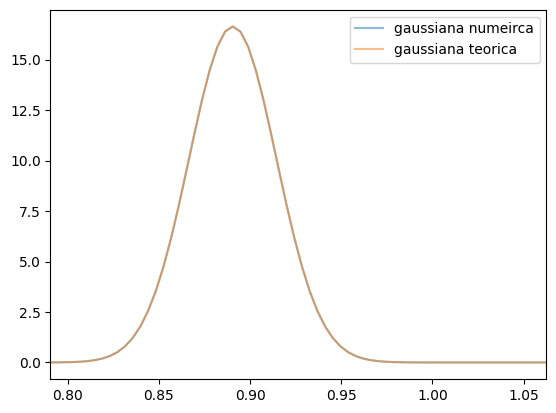

In [36]:
gaussiana1 = (1 / (sigma_mu_numerica * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - x_max_log_like) / sigma_mu_numerica) ** 2)
gaussiana2 = (1 / (sigma_mu * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - media_pesata) / sigma_mu) ** 2)

plt.plot(x_vals, gaussiana1, alpha=0.5, label = "gaussiana numeirca")
plt.plot(x_vals, gaussiana2, alpha=0.5, label = "gaussiana teorica")

min_plot = min(x_max_log_like,mu_hat)-0.1
max_plot = max(x_max_log_like,mu_hat)+0.1

plt.xlim(min_plot, max_plot)
plt.legend()